[DIY Covid-19 Dashboard Kit](https://github.com/fsmeraldi/diy-covid19dash) (C) Fabrizio Smeraldi, 2020 ([f.smeraldi@qmul.ac.uk](mailto:f.smeraldi@qmul.ac.uk) - [web](http://www.eecs.qmul.ac.uk/~fabri/)). All rights reserved.

# Covid-19 Cases across England Dashboard- Ashley Olubanjo

The data presented has been extracted from Public Health England (PHE). It is investigating the distribution of corona virus cases by sex and age bands across England.

In [1]:
import ipywidgets as wdg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from uk_covid19 import Cov19API

In [2]:
%matplotlib inline
# make figures larger
plt.rcParams['figure.dpi'] = 100

In [98]:
jsondata={}
with open("agedistribution.json", "rt") as INFILE:
    data= json.load(INFILE)
datadict=data['data'][0]
datadict

{'males': [{'age': '60_to_64', 'value': 32605, 'rate': 2134.9},
  {'age': '0_to_4', 'value': 11424, 'rate': 674.7},
  {'age': '80_to_84', 'value': 16754, 'rate': 2636.5},
  {'age': '75_to_79', 'value': 17234, 'rate': 1913.4},
  {'age': '90+', 'value': 9177, 'rate': 5520.5},
  {'age': '25_to_29', 'value': 51571, 'rate': 2876.7},
  {'age': '40_to_44', 'value': 41197, 'rate': 2227.9},
  {'age': '55_to_59', 'value': 42723, 'rate': 2217.2},
  {'age': '45_to_49', 'value': 43235, 'rate': 2542.9},
  {'age': '20_to_24', 'value': 58961, 'rate': 3713.6},
  {'age': '70_to_74', 'value': 19914, 'rate': 1497.1},
  {'age': '50_to_54', 'value': 46584, 'rate': 2532.7},
  {'age': '65_to_69', 'value': 22224, 'rate': 1642.8},
  {'age': '35_to_39', 'value': 44586, 'rate': 2346},
  {'age': '30_to_34', 'value': 49479, 'rate': 2559.5},
  {'age': '15_to_19', 'value': 48206, 'rate': 2803.6},
  {'age': '5_to_9', 'value': 12237, 'rate': 676.2},
  {'age': '85_to_89', 'value': 13518, 'rate': 3852.9},
  {'age': '10_t

# Non-interactive Graph 

The cases of corona virus across England, have been organised into sex and age bands. As you can see, there are more cases of corona virus in females across all age bands compared to males, except ages 0- 14 and 65- 79. The majority of corona virus cases occuring are coming from age bands anywhere from 15- 59. Meaning minors and the elderly are least effected.

The highest number of cases are in the age band 20- 24, where females are reaching 70000 Covid-19 cases and males are reaching 600000 cases.

The lowest number of cases are in the age band 90+ for male cases and 0-4 for female cases

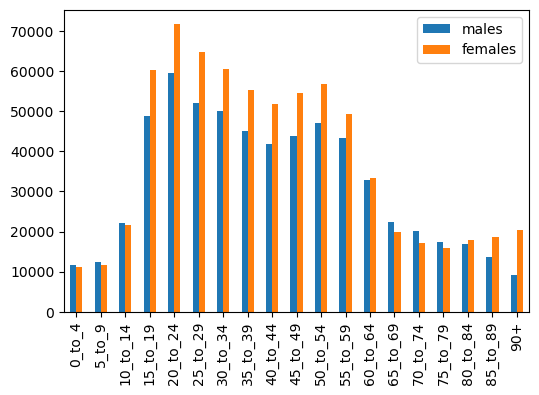

In [52]:

def wrangle_data(data):
    datadict=data['data'][0]
    
    males=datadict['males']
    females=datadict['females']
    
    ageranges=[x['age'] for x in males]
    
    def min_age(agerange):
        agerange=agerange.replace('+','') 
        start=agerange.split('_')[0]
        return int(start)

    ageranges.sort(key=min_age)
    age_df=pd.DataFrame(index=ageranges, columns=['males', 'females','total'])
    
    
    for entry in males: 
        ageband=entry['age'] 
        age_df.loc[ageband, 'males']=entry['value']
    
    for entry in females:
        ageband=entry['age']
        age_df.loc[ageband, 'females']=entry['value']
    

    age_df['total']=age_df['males']+age_df['females']
        
    return age_df

df1= wrangle_data(data) 
df1

age_df.plot(kind='bar', y=['males','females'])
age_df.to_pickle("agedf.pkl")


In [116]:
output = wdg.Output()
@output.capture(clear_output=True, wait=True)
def access_api():
    filters = [
        'areaType=nation',
        'areaName=England'
    ]
    
    structure = {
        "males": "maleCases",
        "females": "femaleCases"
    }
    
    api = Cov19API(filters=filters, structure=structure)
    agedistrubution=api.get_json()
    
    OUTFILE = open('agedistrubution.json', 'wt')
    json.dump(agedistrubution, OUTFILE)
    OUTFILE.close()
    INFILE = open('agedistrubution.json', 'rt')
    jsondata = json.load(INFILE)
    INFILE.close
    
    return jsondata 
    
    

In [115]:

output = wdg.Output()
@output.capture(clear_output=True, wait=True)

def api_button_callback(button):
    print("I'm downloading data from the API...")
    print("...all done.")
    """ Button callback - it must take the button as its parameter (unused in this case).
    Accesses API, wrangles data, updates global variable df used for plotting. """
    
    apidata=access_api(button)
    
    global age_df
    age_df=wrangle_data(data)
   
    
    apibutton.icon="check"
   
    

    
apibutton=wdg.Button(
    description='refresh data', 
    disabled=False,
    button_style='success', 
    tooltip="Click to download current Public Health England data",
    
    icon='download'
)


apibutton.on_click(access_api) 

display(apibutton)
output





Button(button_style='success', description='refresh data', icon='download', style=ButtonStyle(), tooltip='Clic…

Output()

# Interactive Graph

This interactive graph shows the total of both male and female Covid-19 cases across all age bands. The graph shows that the age band with the most Covid-19 cases for both males and females is 20- 24. 

In [99]:

agecols=wdg.SelectMultiple(
    options=['males', 'females', 'total'], 
    value=['males', 'females'], 
    rows=3, 
    description='Sex',
    disabled=False
)

def age_graph(graphcolumns):
    
    ncols=len(graphcolumns)
    if ncols>0:
        age_df.plot(kind='bar', y=list(graphcolumns)) 
    else:
        
        print("Click to select data for graph")
        print("(CTRL-Click to select more than one category)")
        
def refresh_graph():
    """ We change the value of the widget in order to force a redraw of the graph;
    this is useful when the data have been updated. This is a bit of a gimmick; it
    needs to be customised for one of your widgets. """
    current=agecols.value
    if current==agecols.options[0]:
        other=agecols.options[1]
    else:
        other=agecols.options[0]
    agecols.value=other 
    agecols.value=current 
    
    
    
output=wdg.interactive_output(age_graph, {'graphcolumns': agecols})

display(agecols, output)


SelectMultiple(description='Sex', index=(0, 1), options=('males', 'females', 'total'), rows=3, value=('males',…

Output()

**Author and Copyright Notice** Remember if you deploy this dashboard as a Binder it will be publicly accessible. Take credit for your work! Also acknowledge the data source: *Based on UK Government [data](https://coronavirus.data.gov.uk/) published by [Public Health England](https://www.gov.uk/government/organisations/public-health-england).*